In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Data

In [465]:
#import dataset
df = pd.read_csv("../../data/Salary_Data.csv")

Initial EDA

In [466]:
#show first 5 rows of the datset
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [467]:
#number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 6704
Number of columns: 6


In [468]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [469]:
#show statistical summary
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [470]:
#check number of null values in each column
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [471]:
#check number of null values percentage in each column
df.isnull().sum()/df.shape[0]*100

Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
dtype: float64

In [472]:
#show the rows where the 'Salary' column value is null
salary_null_rows = df[df['Salary'].isnull()]
print(salary_null_rows)

       Age  Gender    Education Level            Job Title  \
172    NaN     NaN                NaN                  NaN   
260    NaN     NaN                NaN                  NaN   
3136  31.0    Male    Master's Degree  Full Stack Engineer   
5247  26.0  Female  Bachelor's Degree             Social M   
6455  36.0    Male  Bachelor's Degree       Sales Director   

      Years of Experience  Salary  
172                   NaN     NaN  
260                   NaN     NaN  
3136                  8.0     NaN  
5247                  NaN     NaN  
6455                  6.0     NaN  


In [473]:
#check number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(4912)

In [474]:
#group the DataFrame by all its columns to find identical rows,
duplicate_counts = df.groupby(list(df.columns)).size().reset_index(name='count')

#count how many times each unique row appears,
#keep only those that appear more than once,
#sort them in descending order by their frequency
duplicate_counts = duplicate_counts[duplicate_counts['count'] > 1].sort_values('count', ascending=False)

print("\nMost repeated rows:")

#show the top 10 most repeated rows
print(duplicate_counts.head(10))


Most repeated rows:
      Age  Gender    Education Level          Job Title  Years of Experience  \
56   24.0  Female        High School       Receptionist                  0.0   
794  32.0    Male  Bachelor's Degree    Product Manager                  7.0   
317  27.0    Male  Bachelor's Degree  Software Engineer                  3.0   
782  32.0    Male         Bachelor's  Software Engineer                  8.0   
841  33.0  Female           Master's    Product Manager                 11.0   
482  29.0  Female           Master's     Data Scientist                  6.0   
288  27.0    Male         Bachelor's  Software Engineer                  4.0   
130  25.0    Male  Bachelor's Degree    Product Manager                  1.0   
184  26.0    Male         Bachelor's       Data Analyst                  3.0   
522  29.0    Male  Bachelor's Degree  Marketing Analyst                  4.0   

       Salary  count  
56    25000.0     45  
794  120000.0     45  
317   80000.0     45  
782  1

In [475]:
#check that 'Age' is greater than the 'Years of Experience' in each row
df['Years of Experience'] < (df['Age'])

0       True
1       True
2       True
3       True
4       True
        ... 
6699    True
6700    True
6701    True
6702    True
6703    True
Length: 6704, dtype: bool

In [476]:
#check unique values in each column
for col in df.columns:
    print(f"{col} → {df[col].unique()[:10]}")

Age → [32. 28. 45. 36. 52. 29. 42. 31. 26. 38.]
Gender → ['Male' 'Female' nan 'Other']
Education Level → ["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Job Title → ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist']
Years of Experience → [ 5.  3. 15.  7. 20.  2. 12.  4.  1. 10.]
Salary → [ 90000.  65000. 150000.  60000. 200000.  55000. 120000.  80000.  45000.
 110000.]


In [477]:
#check number of outliers in each numeric column
numeric_cols = ['Age', 'Years of Experience', 'Salary']

for col in numeric_cols:
    #calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    #calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #count outliers
    outliers_count = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    print(f"{col} → {outliers_count}")

Age → 123
Years of Experience → 75
Salary → 0


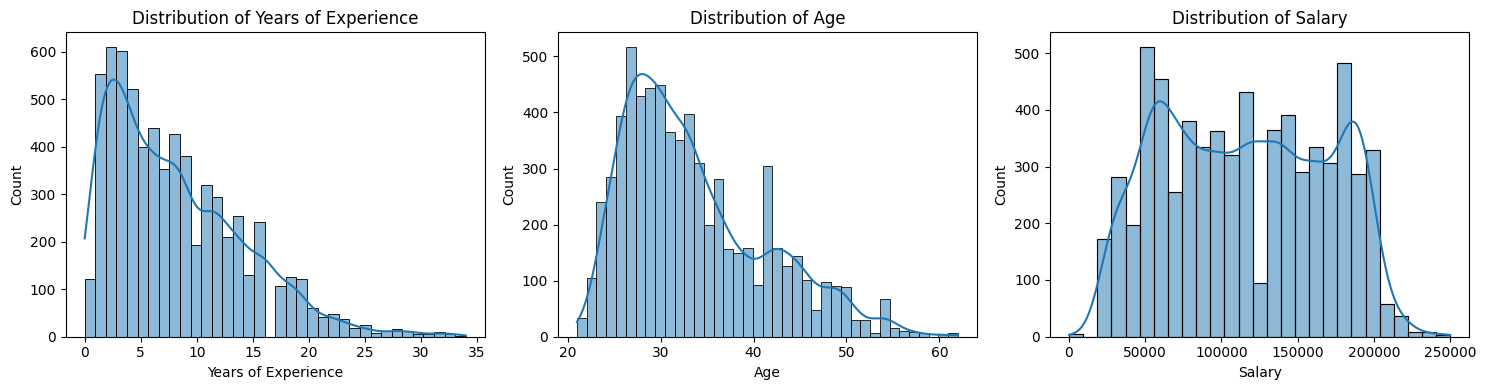

In [478]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.histplot(df['Years of Experience'], kde=True)
plt.title("Distribution of Years of Experience")

plt.subplot(1, 3, 2)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Distribution of Age")

plt.subplot(1, 3, 3)
sns.histplot(df['Salary'].dropna(), kde=True)
plt.title("Distribution of Salary")

plt.tight_layout()

plt.show()

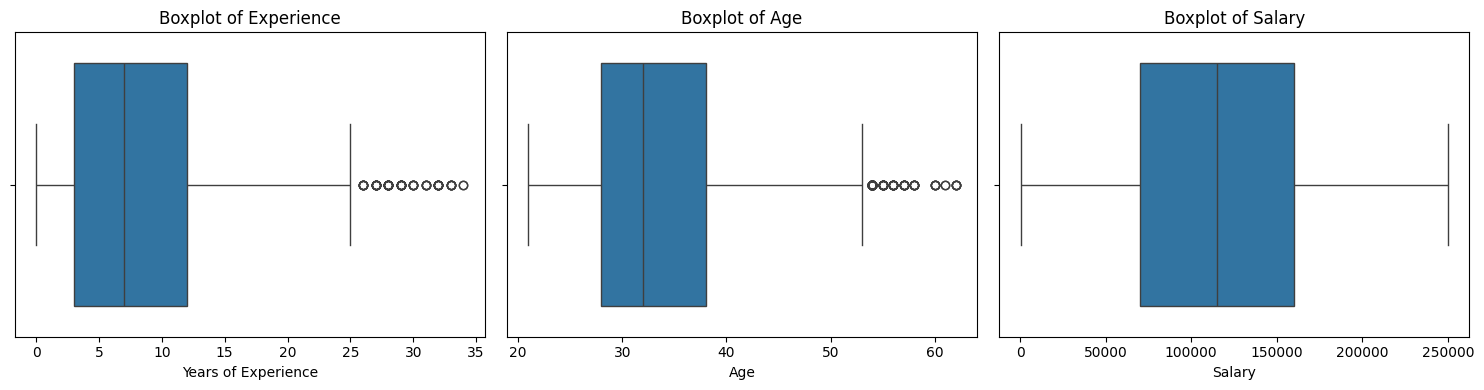

In [479]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Years of Experience'].dropna())
plt.title("Boxplot of Experience")

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Age'].dropna())
plt.title("Boxplot of Age")

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Salary'].dropna())
plt.title("Boxplot of Salary")

plt.tight_layout()
plt.show()

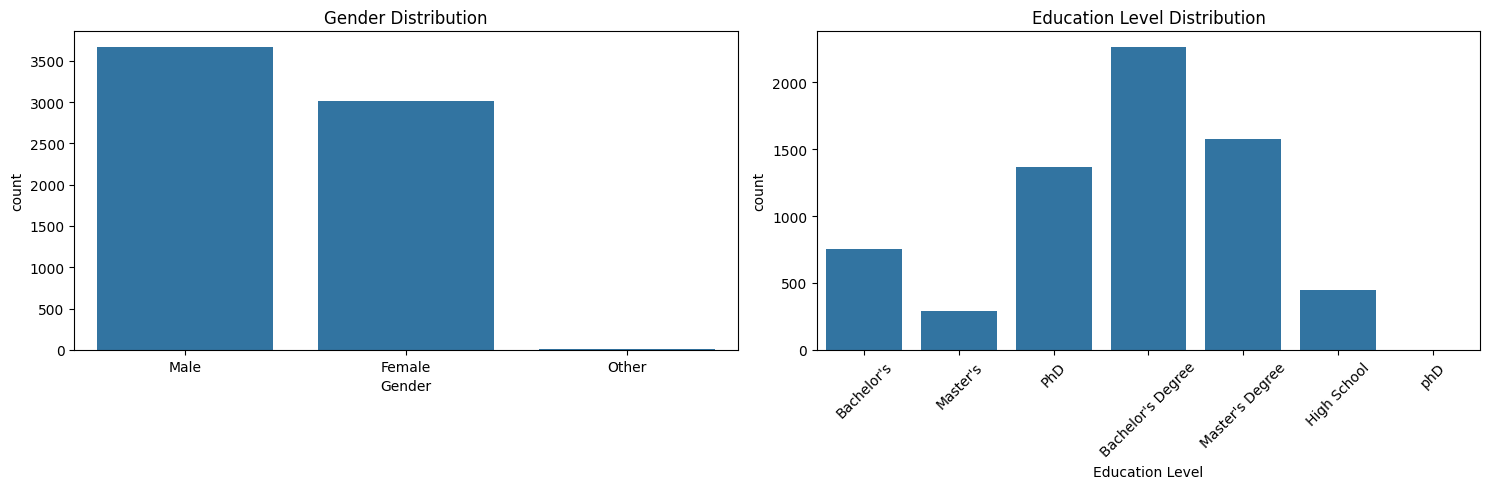

In [480]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x='Education Level', data=df)
plt.xticks(rotation=45)
plt.title("Education Level Distribution")

plt.tight_layout()
plt.show()

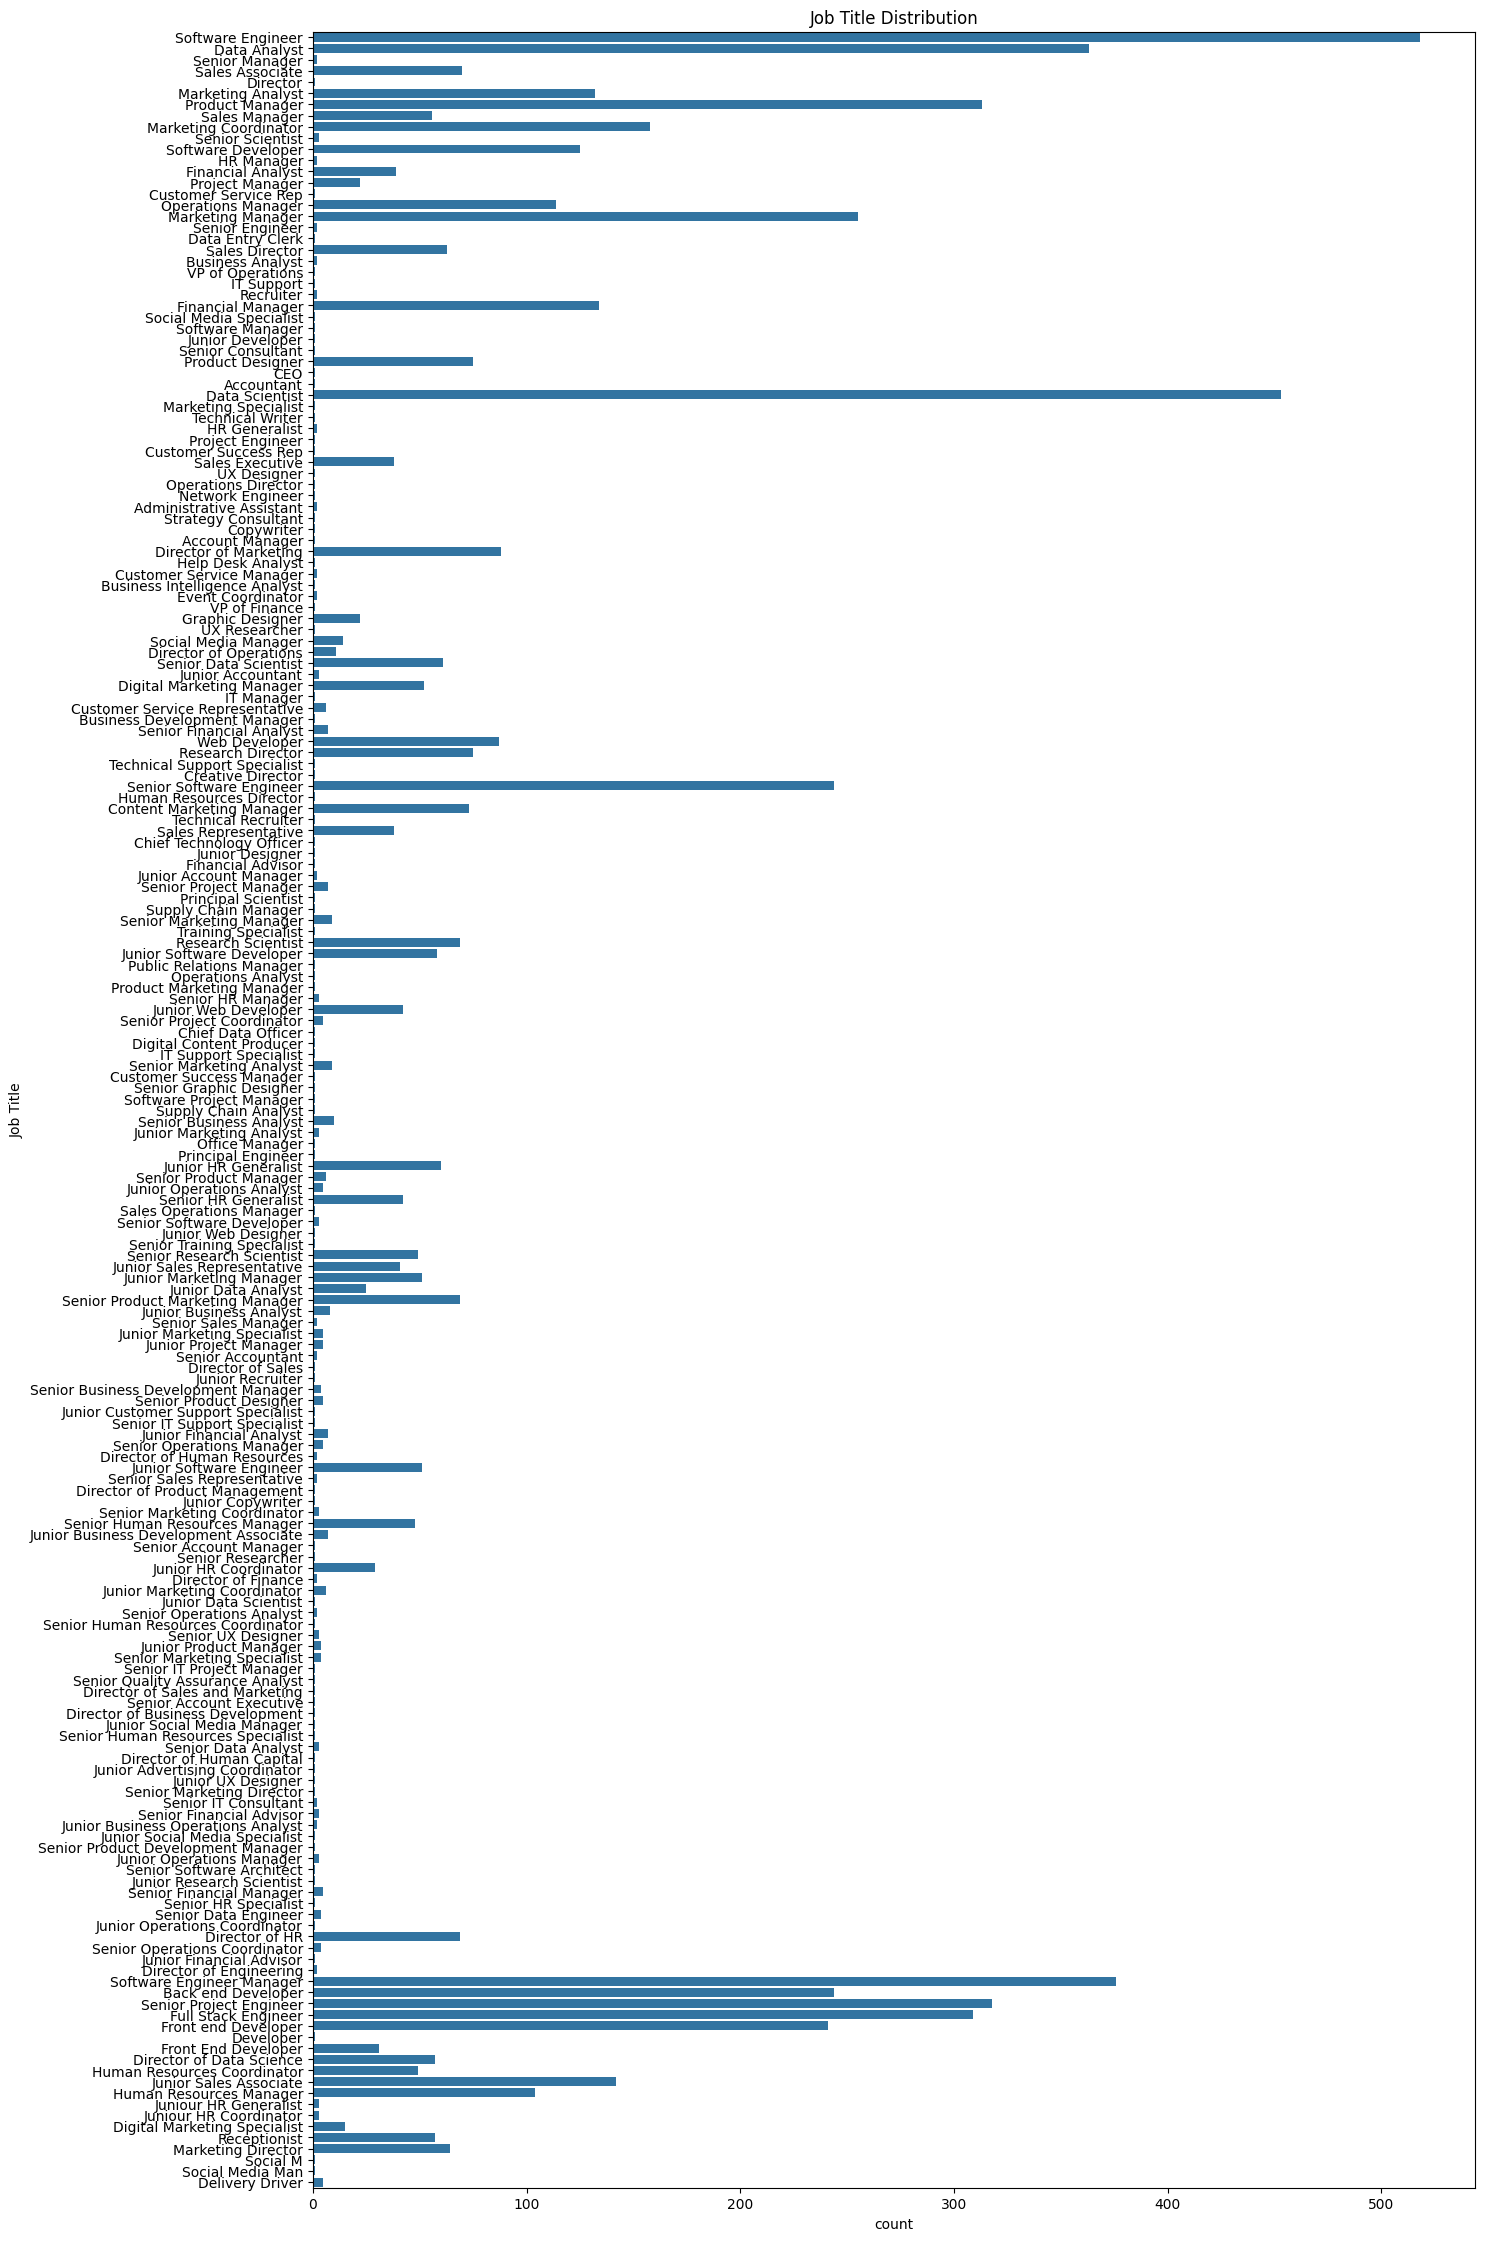

In [481]:
plt.figure(figsize=(15,28))
sns.countplot(y='Job Title', data=df)
plt.title("Job Title Distribution")
plt.show()

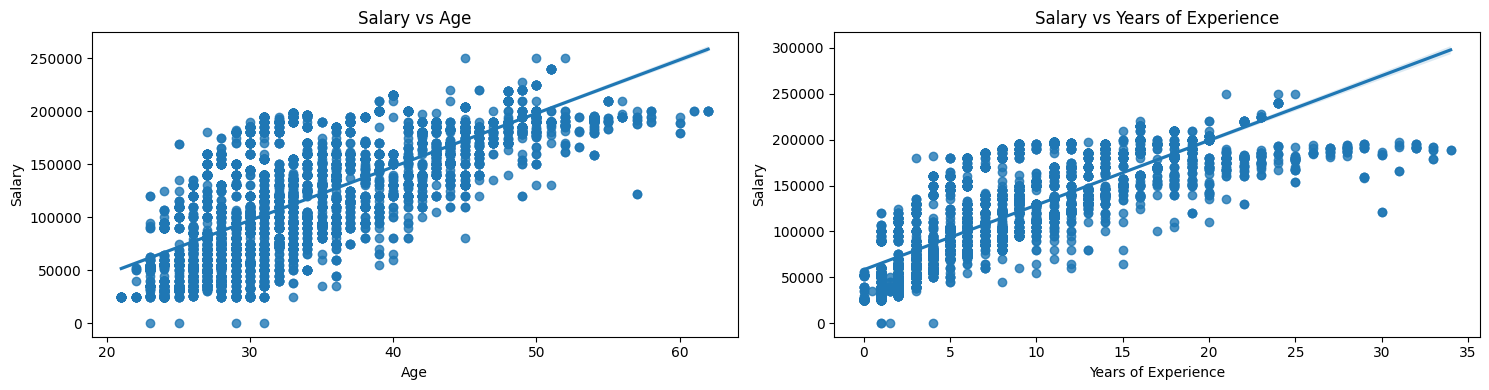

In [482]:
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
sns.regplot(x='Age', y='Salary', data=df)
plt.title("Salary vs Age")

plt.subplot(1, 2, 2)
sns.regplot(x='Years of Experience', y='Salary', data=df)
plt.title("Salary vs Years of Experience")
plt.tight_layout()

plt.show()

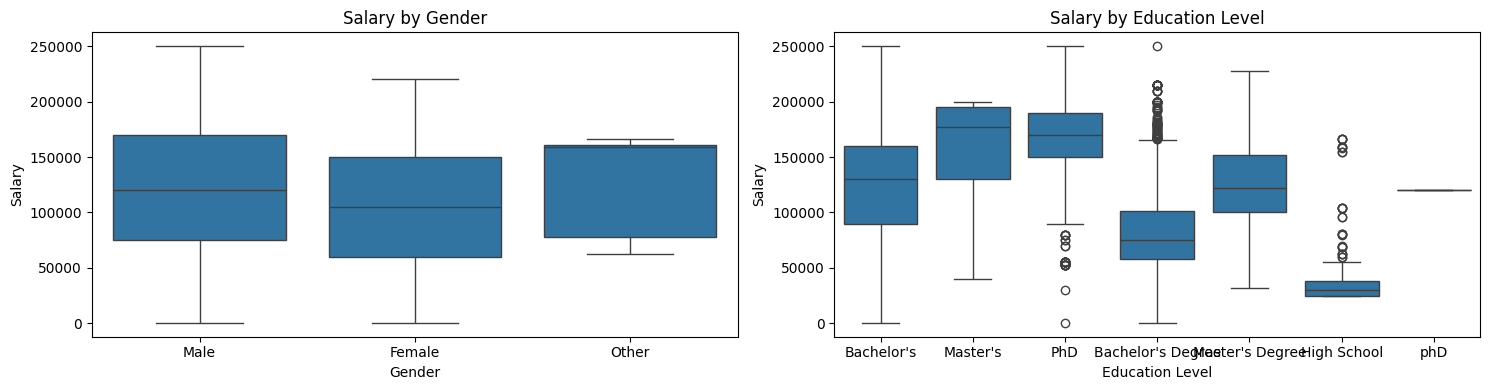

In [483]:
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title("Salary by Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title("Salary by Education Level")

plt.tight_layout()
plt.show()

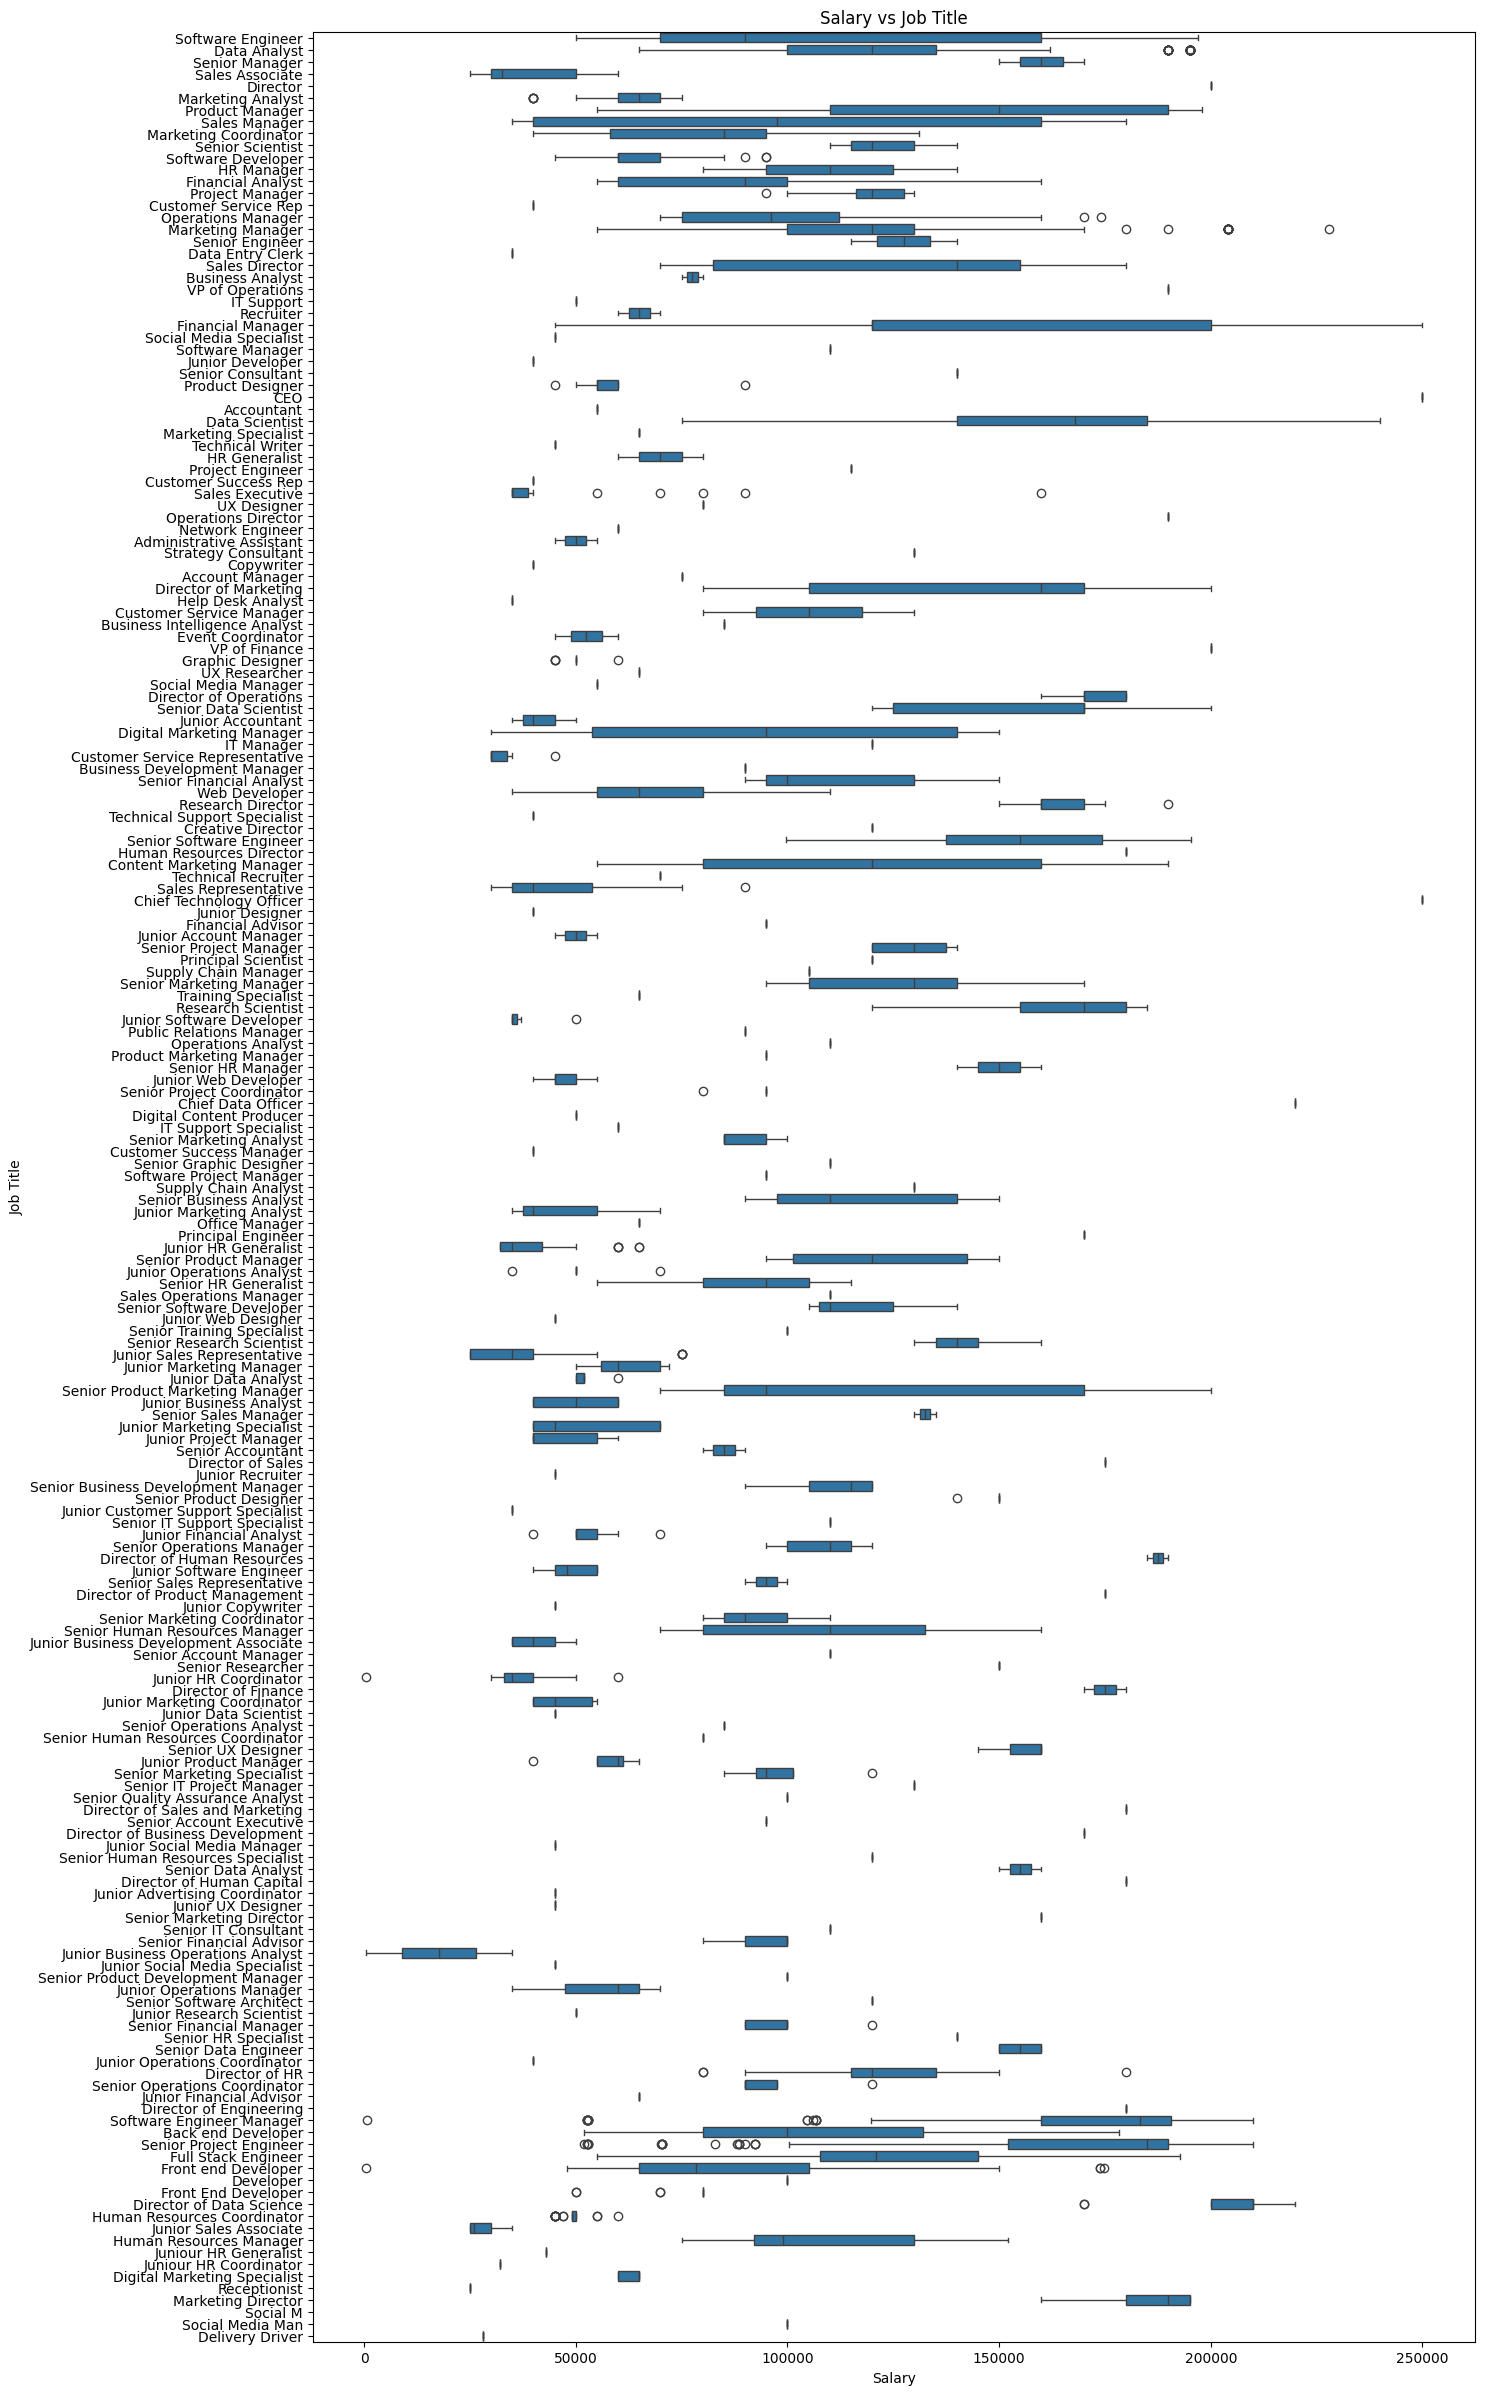

In [484]:
plt.figure(figsize=(15,30))
sns.boxplot(y='Job Title', x='Salary', data=df)
plt.title("Salary vs Job Title")

plt.show()


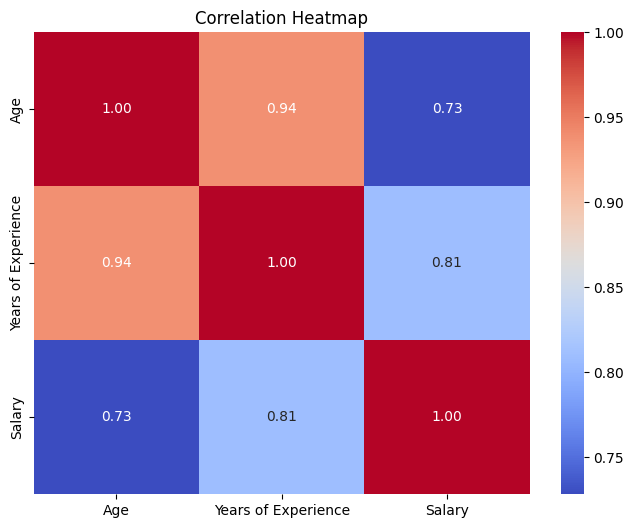

In [485]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

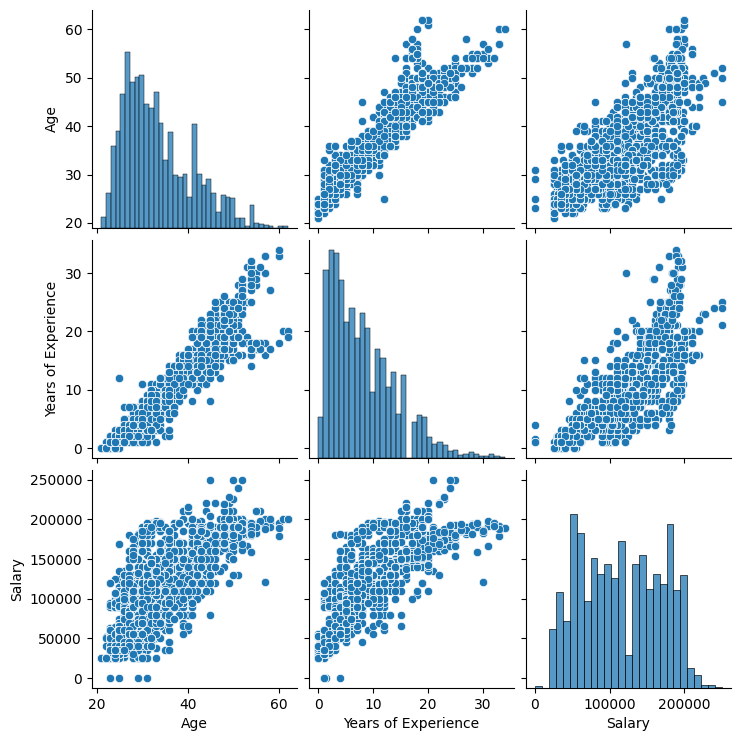

In [486]:
sns.pairplot(df)

Data Cleaning

In [487]:
#clean the 'Education Level' column
#replace different versions of the same degree with a single standard format("Bachelor's Degree" → "Bachelor's", "Master's Degree" → "Master's", "phD" → "PhD")
df['Education Level'] = df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})

#remove any extra spaces from the beginning or end of each value
df['Education Level'] = df['Education Level'].str.strip()

In [488]:
#drop rows where 'Slary' is a null value
df = df.dropna(subset=['Salary'])

#reset the DataFrame index after removing duplicates
df = df.dropna(subset=['Salary']).reset_index(drop=True)

print(df['Education Level'].mode()[0])

#fill nulls in the 'Education Level' column with mode of that column 
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
 

Bachelor's


In [489]:
#remove duplicate rows from the DataFrame and keeping only the first occurrence of each duplicate
df = df.drop_duplicates(keep='first')

#reset the DataFrame index after removing duplicates
df = df.reset_index(drop=True)


In [490]:
#remove outliers in mumeric columns
for col in numeric_cols:
    #remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#reset the DataFrame index after removing duplicates
df = df.reset_index(drop=True)

Final EDA

In [491]:
#number of rows and columns after cleaning the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1787
Number of columns: 6


In [492]:
#statistical summary after cleaning the dataset
print(df.describe())

               Age  Years of Experience         Salary
count  1787.000000          1787.000000    1787.000000
mean     35.137661             9.157806  113212.639619
std       8.214718             6.844027   51575.806577
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   70000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  160000.000000
max      62.000000            34.000000  250000.000000


In [493]:
#check that all nulls are removed after cleaning the dataset
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [494]:
#check that duplicates are removed after cleaning the dataset
print(df.duplicated().sum())

0


In [495]:
#Check that text inconsistencies have been fixed in the 'Education Level' column 
print(df['Education Level'].unique())

["Bachelor's" "Master's" 'PhD' 'High School']


In [496]:
#check that outliers are removed after cleaning the dataset
for col in numeric_cols:
    #calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers after removal
    outliers_before = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    print(f"{col} → {outliers_count}")

Age → 0
Years of Experience → 0
Salary → 0


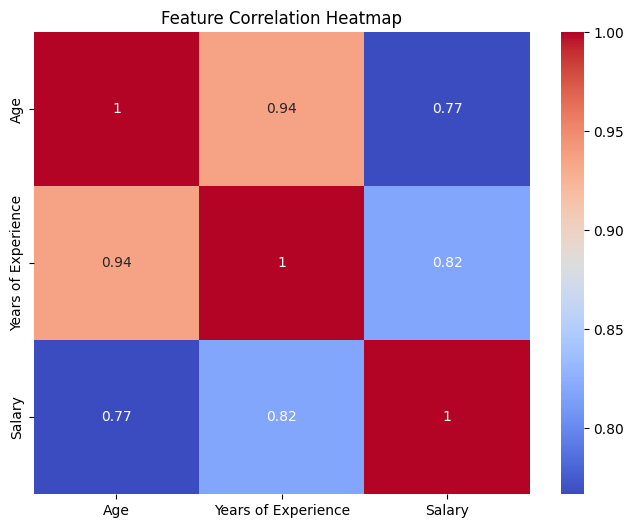

In [519]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Feature and Target Separation

In [498]:
X = df.drop('Salary', axis=1)
y = df['Salary']

Feature Engineering

In [499]:
from sklearn.preprocessing import OneHotEncoder

#convert categorical columns into numeric format using one-hot encoding
X_ohe = pd.get_dummies(X, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)


Splitting Data

In [500]:
from sklearn.model_selection import train_test_split

#split data 80% to train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=42)

Scaling

In [501]:
from sklearn.preprocessing import StandardScaler

#standardize the features using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  #fit the scaler on the training data and transform it
X_test_scaled = scaler.transform(X_test)        #transform the test data using the same scaler

Model Build

In [502]:
from sklearn.linear_model import LinearRegression

#create linear regression object called model 
model = LinearRegression()

#train the model using scaled training data
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Cross Validation

In [503]:
from sklearn.model_selection import cross_val_score

#perform 5-fold cross-validation on training data
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross Validation R2 Scores:", scores)
print("Mean Cross Validation R2 Score:", scores.mean())

Cross Validation R2 Scores: [0.85855685 0.8459523  0.80208954 0.82247082 0.85722726]
Mean Cross Validation R2 Score: 0.8372593541754003


Test Set  Evaluation

In [504]:
from sklearn.metrics import mean_squared_error, r2_score

#predict on test set
y_pred = model.predict(X_test_scaled)

#evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#print results with explanation
print("=== Model Evaluation ===")

#r2 score
print(f"R² Score: {r2:.4f}")

if r2 > 0.7:
    print(f"Model explains {r2*100:.2f}% of the variance: good fit!\n")
elif 0.5 < r2 < 0.7:
    print(f"Model explains {r2*100:.2f}% of the variance: moderate fit!\n")
else:
    print(f"Model explains {r2*100:.2f}% of the variance: poor fit!\n")

#rmse
print(f"RMSE: {rmse:.2f}")
print(f"On average, predictions deviate by ~{rmse:.0f} from actual salaries.")

=== Model Evaluation ===
R² Score: 0.8292
Model explains 82.92% of the variance: good fit!

RMSE: 21326.37
On average, predictions deviate by ~21326 from actual salaries.


Residuals Analysis

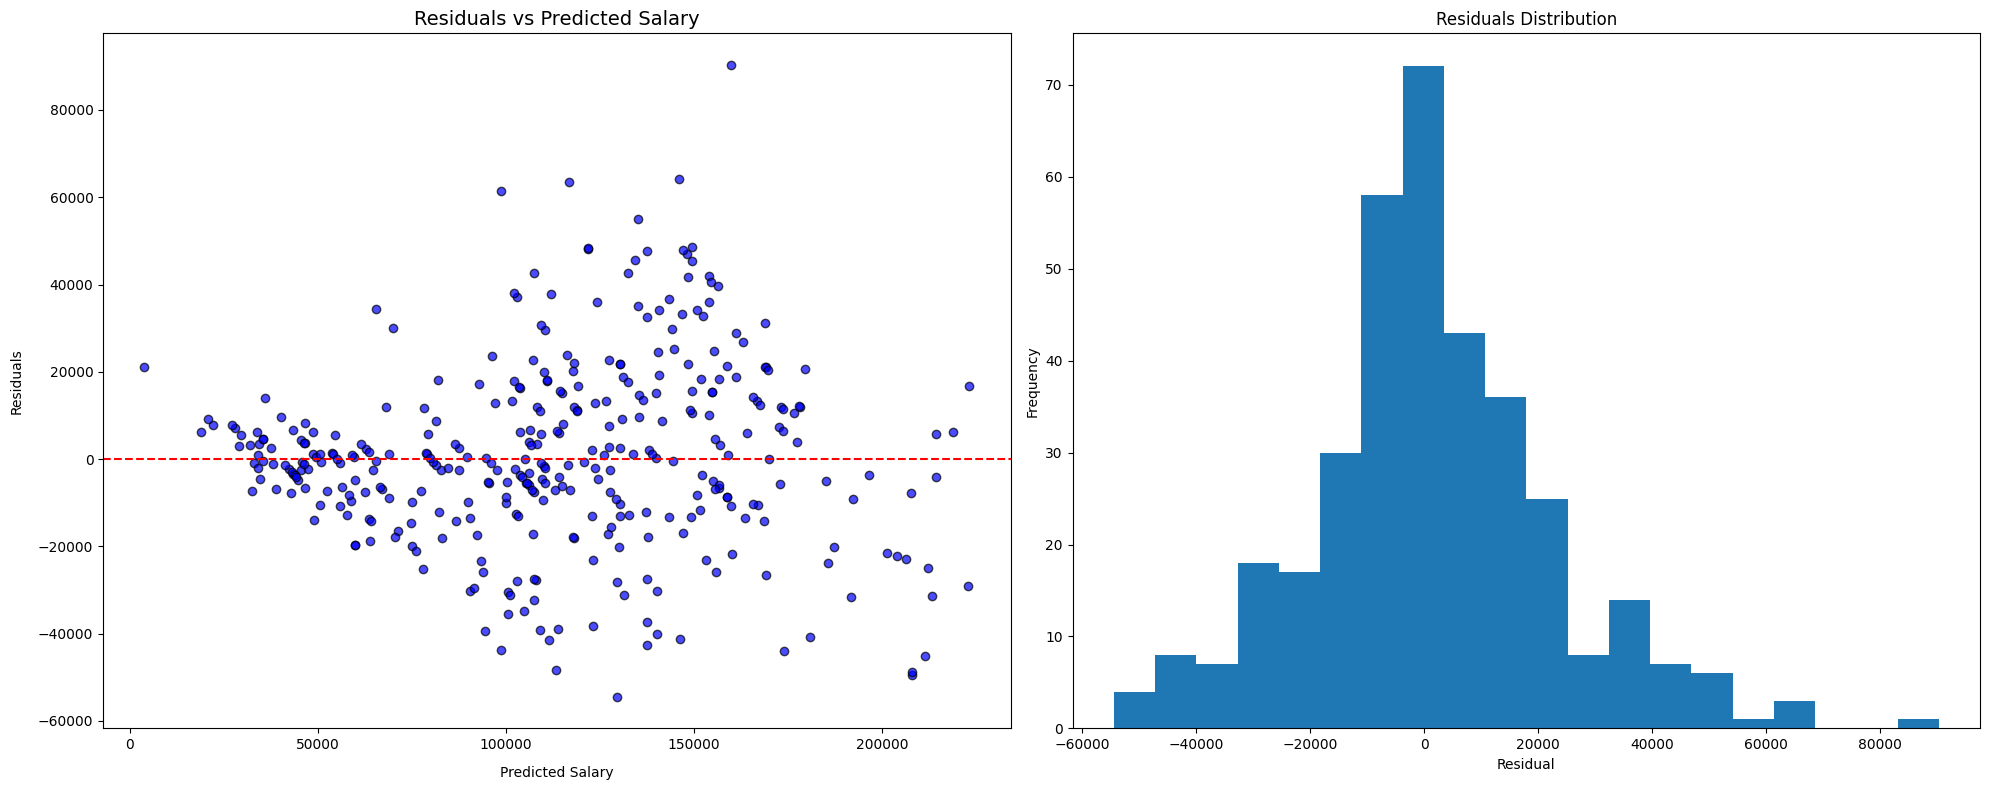

In [536]:
#calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(20,8))
#residuals vs Predicted plot

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Salary", labelpad=10)
plt.ylabel("Residuals", labelpad=10)
plt.title("Residuals vs Predicted Salary", loc='center', fontsize=14)


#histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20)
plt.subplot(1, 2, 2)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")


plt.tight_layout()
plt.show()